# Sử dụng Decision Tree, Naïve Bayes, K Nearest Neighbors, Neural Network để xây dựng mô hình phân lớp trên bộ dữ liệu Iris từ thư
Mô tả bộ dữ liệu Iris: Bộ dữ liệu Iris bao gồm thông tin về 3 loài hoa Iris khác nhau:
Iris setosa, Iris versicolor và Iris virginica. Gồm 4 thuộc tính đo lường (đơn vị cm):
Chiều dài của lá đài (sepal length); Chiều rộng của lá đài (sepal width); Chiều dài của
cánh hoa (petal length); Chiều rộng của cánh hoa (petal width).
Bộ dữ liệu Iris thường được sử dụng để thực hiện các tác vụ phân loại và nhận
dạng loài hoa dựa trên các thuộc tính đã nêu trên.


**a) Đọc bộ dữ liệu Iris từ sklearn**

In [2]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

print("Huỳnh Thị Trúc Lam - 6351071040")

# Display the keys of the dataset to see what's included
print("Keys of iris_dataset:\n{}".format(iris.keys()))

# Display the description of the dataset
print(iris['DESCR'][:193] + "\n...")

Huỳnh Thị Trúc Lam - 6351071040
Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


**b) Khảo sát bộ dữ liệu Iris**

In [6]:
print("Huỳnh Thị Trúc Lam - 6351071040")
print("Tên các thuộc tính (features):", iris.feature_names)
print("Tên các lớp (target classes):", iris.target_names)

Huỳnh Thị Trúc Lam - 6351071040
Tên các thuộc tính (features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tên các lớp (target classes): ['setosa' 'versicolor' 'virginica']


In [4]:
print("Số lượng mẫu dữ liệu:", iris.data.shape[0])
print("Số lượng thuộc tính:", iris.data.shape[1])
print("Kích thước của dữ liệu (mẫu, thuộc tính):", iris.data.shape)
print("Kích thước của nhãn (target):", iris.target.shape)

Số lượng mẫu dữ liệu: 150
Số lượng thuộc tính: 4
Kích thước của dữ liệu (mẫu, thuộc tính): (150, 4)
Kích thước của nhãn (target): (150,)


In [5]:
print("5 mẫu dữ liệu đầu tiên:\n", iris.data[:5])
print("5 nhãn (target) tương ứng:\n", iris.target[:5])

5 mẫu dữ liệu đầu tiên:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
5 nhãn (target) tương ứng:
 [0 0 0 0 0]


In [7]:
import pandas as pd

# Tạo DataFrame từ dữ liệu Iris để dễ dàng thực hiện thống kê
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Thêm cột target (nhãn) vào DataFrame để xem xét phân bố
iris_df['species'] = iris.target_names[iris.target]

# Sử dụng hàm .describe() để thống kê mô tả
print("Huỳnh Thị Trúc Lam - 6351071040")
print("Thống kê mô tả của bộ dữ liệu Iris:\n")
display(iris_df.describe())

Huỳnh Thị Trúc Lam - 6351071040
Thống kê mô tả của bộ dữ liệu Iris:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**c) Chuẩn hóa dữ liệu data về đoạn [0,1]**

In [9]:
# Gán X là data và Y là target của bộ dữ liệu
X = iris.data
Y = iris.target

# Tìm giá trị lớn nhất trong mỗi cột của X
max_values = X.max(axis=0)

# Chuẩn hóa dữ liệu X về đoạn [0,1] bằng cách chia cho giá trị lớn nhất của mỗi cột
X_normalized = X / max_values

print("Huỳnh Thị Trúc Lam - 6351071040")
print("5 mẫu dữ liệu X chưa chuẩn hóa đầu tiên:\n", X[:5])
print("Giá trị lớn nhất của mỗi thuộc tính:\n", max_values)
print("5 mẫu dữ liệu X đã chuẩn hóa đầu tiên:\n", X_normalized[:5])
print("Kích thước của Y:\n", Y.shape)
print("5 nhãn Y đầu tiên:\n", Y[:5])

Huỳnh Thị Trúc Lam - 6351071040
5 mẫu dữ liệu X chưa chuẩn hóa đầu tiên:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Giá trị lớn nhất của mỗi thuộc tính:
 [7.9 4.4 6.9 2.5]
5 mẫu dữ liệu X đã chuẩn hóa đầu tiên:
 [[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]
Kích thước của Y:
 (150,)
5 nhãn Y đầu tiên:
 [0 0 0 0 0]


**d) Chia dữ liệu thành tập train và tập test theo tỷ lệ 8:2**

In [10]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỷ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Kích thước tập huấn luyện X_train:", X_train.shape)
print("Kích thước tập kiểm tra X_test:", X_test.shape)
print("Kích thước nhãn huấn luyện y_train:", y_train.shape)
print("Kích thước nhãn kiểm tra y_test:", y_test.shape)

Huỳnh Thị Trúc Lam - 6351071040
Kích thước tập huấn luyện X_train: (120, 4)
Kích thước tập kiểm tra X_test: (30, 4)
Kích thước nhãn huấn luyện y_train: (120,)
Kích thước nhãn kiểm tra y_test: (30,)


**e) Sử dụng Cây quyết định (Decision Tree) để phân lớp**

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
decision_tree_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

Dự đoán nhãn lớp cho tập test

In [13]:
# Dự đoán nhãn lớp trên tập test
y_pred_dt = decision_tree_model.predict(X_test)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("5 dự đoán đầu tiên trên tập test:\n", y_pred_dt[:5])

Huỳnh Thị Trúc Lam - 6351071040
5 dự đoán đầu tiên trên tập test:
 [1 0 2 1 1]


Tính và in ra Accuracy của mô hình trên tập test

In [16]:
# Tính toán độ chính xác (Accuracy)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Accuracy của mô hình Decision Tree trên tập test: {accuracy_dt:.4f}")

Huỳnh Thị Trúc Lam - 6351071040
Accuracy của mô hình Decision Tree trên tập test: 1.0000


Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test

In [17]:
# In ra báo cáo phân loại chi tiết (Precision, Recall, F1-score)
print("Huỳnh Thị Trúc Lam - 6351071040")
print("\nClassification Report cho mô hình Decision Tree:\n")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

Huỳnh Thị Trúc Lam - 6351071040

Classification Report cho mô hình Decision Tree:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Hiển thị confusion matrix bằng heat map (bản đồ nhiệt)

Huỳnh Thị Trúc Lam - 6351071040


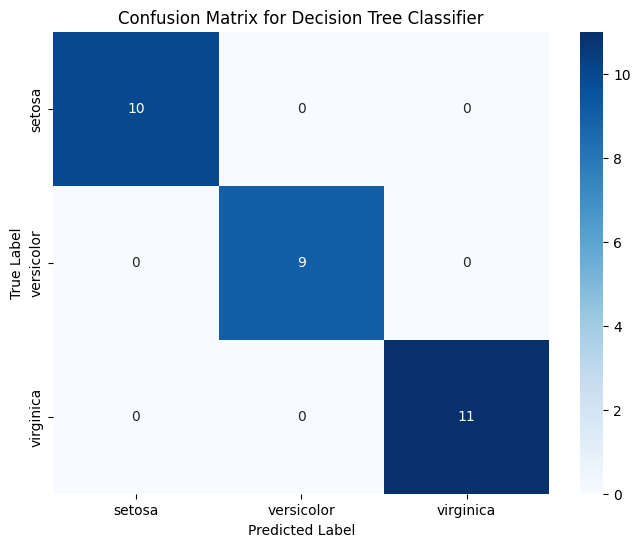

In [18]:
# Tính toán Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Hiển thị Confusion Matrix bằng heatmap
print("Huỳnh Thị Trúc Lam - 6351071040")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**f) Sử dụng Naïve Bayes để phân lớp**

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình Gaussian Naïve Bayes
naive_bayes_model = GaussianNB()

# Huấn luyện mô hình trên tập huấn luyện
naive_bayes_model.fit(X_train, y_train)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Mô hình Naïve Bayes đã được huấn luyện thành công.")

Huỳnh Thị Trúc Lam - 6351071040
Mô hình Naïve Bayes đã được huấn luyện thành công.


Dự đoán nhãn lớp cho tập test (Naïve Bayes)

In [20]:
# Dự đoán nhãn lớp trên tập test
y_pred_nb = naive_bayes_model.predict(X_test)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("5 dự đoán đầu tiên trên tập test (Naïve Bayes):\n", y_pred_nb[:5])

Huỳnh Thị Trúc Lam - 6351071040
5 dự đoán đầu tiên trên tập test (Naïve Bayes):
 [1 0 2 1 1]


Tính và in ra Accuracy của mô hình trên tập test (Naïve Bayes)

In [ ]:
# Tính toán độ chính xác (Accuracy)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Accuracy của mô hình Naïve Bayes trên tập test: {accuracy_nb:.4f}")

Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test (Naïve Bayes)

In [21]:
# In ra báo cáo phân loại chi tiết (Precision, Recall, F1-score)
print("Huỳnh Thị Trúc Lam - 6351071040")
print("\nClassification Report cho mô hình Naïve Bayes:\n")
print(classification_report(y_test, y_pred_nb, target_names=iris.target_names))

Huỳnh Thị Trúc Lam - 6351071040

Classification Report cho mô hình Naïve Bayes:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Hiển thị confusion matrix bằng heat map (bản đồ nhiệt) (Naïve Bayes)

Huỳnh Thị Trúc Lam - 6351071040


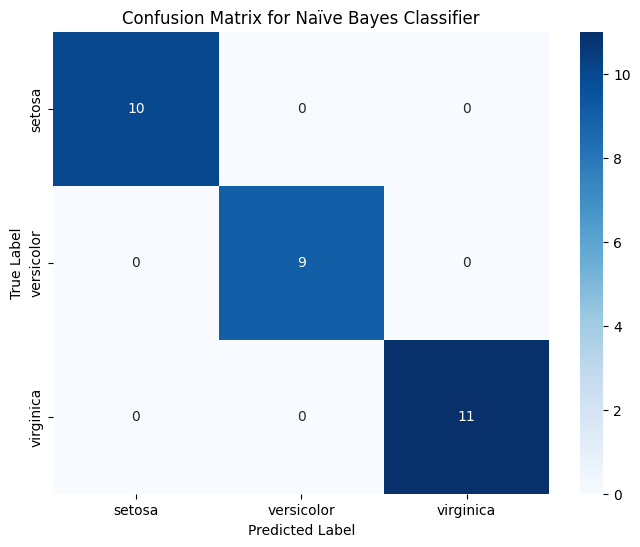

In [22]:
# Tính toán Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Hiển thị Confusion Matrix bằng heatmap
print("Huỳnh Thị Trúc Lam - 6351071040")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Naïve Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**g) Sử dụng K Nearest Neighbors Classizier để phân lớp**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Khởi tạo mô hình K Nearest Neighbors với k=5 (mặc định)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Mô hình K Nearest Neighbors đã được huấn luyện thành công.")

Huỳnh Thị Trúc Lam - 6351071040
Mô hình K Nearest Neighbors đã được huấn luyện thành công.


Dự đoán nhãn lớp cho tập test (K Nearest Neighbors)

In [24]:
# Dự đoán nhãn lớp trên tập test
y_pred_knn = knn_model.predict(X_test)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("5 dự đoán đầu tiên trên tập test (K Nearest Neighbors):\n", y_pred_knn[:5])

Huỳnh Thị Trúc Lam - 6351071040
5 dự đoán đầu tiên trên tập test (K Nearest Neighbors):
 [1 0 2 1 1]


Tính và in ra Accuracy của mô hình trên tập test (K Nearest Neighbors)

In [25]:
# Tính toán độ chính xác (Accuracy)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Accuracy của mô hình K Nearest Neighbors trên tập test: {accuracy_knn:.4f}")

Huỳnh Thị Trúc Lam - 6351071040
Accuracy của mô hình K Nearest Neighbors trên tập test: 1.0000


Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test (K Nearest Neighbors)

In [26]:
# In ra báo cáo phân loại chi tiết (Precision, Recall, F1-score)
print("Huỳnh Thị Trúc Lam - 6351071040")
print("\nClassification Report cho mô hình K Nearest Neighbors:\n")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

Huỳnh Thị Trúc Lam - 6351071040

Classification Report cho mô hình K Nearest Neighbors:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Hiển thị confusion matrix bằng heat map (bản đồ nhiệt) (K Nearest Neighbors)

Huỳnh Thị Trúc Lam - 6351071040


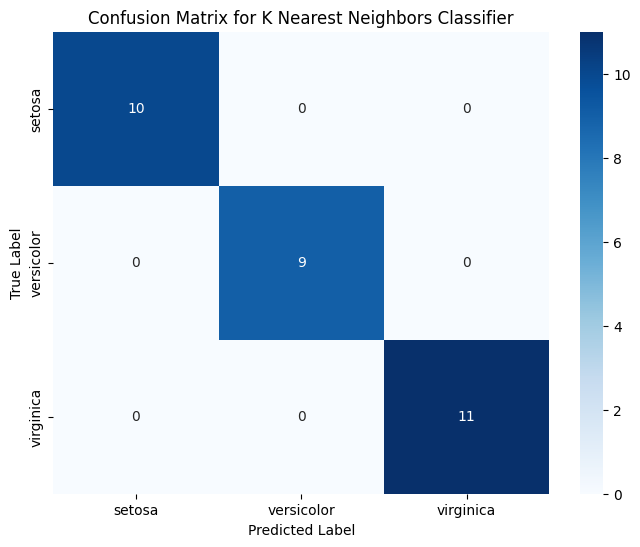

In [27]:
# Tính toán Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Hiển thị Confusion Matrix bằng heatmap
print("Huỳnh Thị Trúc Lam - 6351071040")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for K Nearest Neighbors Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**h) Sử dụng Neural Network để phân lớp**

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Xác định số lượng lớp đầu ra
num_classes = len(iris.target_names)

# Xây dựng mô hình Neural Network
neural_network_model = keras.Sequential([
    # Lớp Input
    keras.Input(shape=(X_train.shape[1],)),
    # Lớp ẩn đầu tiên: 10 neuron, ReLu activation, fully connected
    layers.Dense(10, activation='relu'),
    # Lớp ẩn thứ hai: 20 neuron, ReLu activation, fully connected
    layers.Dense(20, activation='relu'),
    # Lớp đầu ra: số lượng neuron bằng số lớp, Softmax activation, fully connected
    layers.Dense(num_classes, activation='softmax')
])

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Mô hình Neural Network đã được xây dựng:")
neural_network_model.summary()

Huỳnh Thị Trúc Lam - 6351071040
Mô hình Neural Network đã được xây dựng:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333 (1.30 KB)

 Trainable params: 333 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

Biên dịch mô hình

In [30]:
# Biên dịch mô hình
neural_network_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Mô hình đã được biên dịch thành công.")

Huỳnh Thị Trúc Lam - 6351071040
Mô hình đã được biên dịch thành công.


Huấn luyện mô hình

In [31]:
# Huấn luyện mô hình
history = neural_network_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=1,
    verbose=1
)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Mô hình Neural Network đã được huấn luyện thành công.")

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3288 - loss: 1.1013
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3596 - loss: 1.0487
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5634 - loss: 0.9878
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6872 - loss: 0.8947
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7916 - loss: 0.8144
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - loss: 0.7245
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7280 - loss: 0.5927
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8422 - loss: 0.4989
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.4220
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9380 - loss: 0.4364
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9160 - loss: 0.3530
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━

Dự đoán nhãn lớp cho tập test (Neural Network)

In [32]:
# Dự đoán xác suất lớp trên tập test
y_pred_nn_probabilities = neural_network_model.predict(X_test)

# Chuyển đổi xác suất thành nhãn lớp dự đoán
y_pred_nn = np.argmax(y_pred_nn_probabilities, axis=1)

print("Huỳnh Thị Trúc Lam - 6351071040")
print("5 dự đoán đầu tiên trên tập test (Neural Network):\n", y_pred_nn[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Huỳnh Thị Trúc Lam - 6351071040
5 dự đoán đầu tiên trên tập test (Neural Network):
 [1 0 2 1 1]


Tính và in ra Accuracy của mô hình trên tập test (Neural Network)

In [33]:
# Tính toán độ chính xác (Accuracy)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print("Huỳnh Thị Trúc Lam - 6351071040")
print(f"Accuracy của mô hình Neural Network trên tập test: {accuracy_nn:.4f}")

Huỳnh Thị Trúc Lam - 6351071040
Accuracy của mô hình Neural Network trên tập test: 1.0000


Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của mô hình trên tập test (Neural Network)

In [34]:
# In ra báo cáo phân loại chi tiết (Precision, Recall, F1-score)
print("Huỳnh Thị Trúc Lam - 6351071040")
print("\nClassification Report cho mô hình Neural Network:\n")
print(classification_report(y_test, y_pred_nn, target_names=iris.target_names))

Huỳnh Thị Trúc Lam - 6351071040

Classification Report cho mô hình Neural Network:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Hiển thị confusion matrix bằng heat map (bản đồ nhiệt) (Neural Network)

Huỳnh Thị Trúc Lam - 6351071040


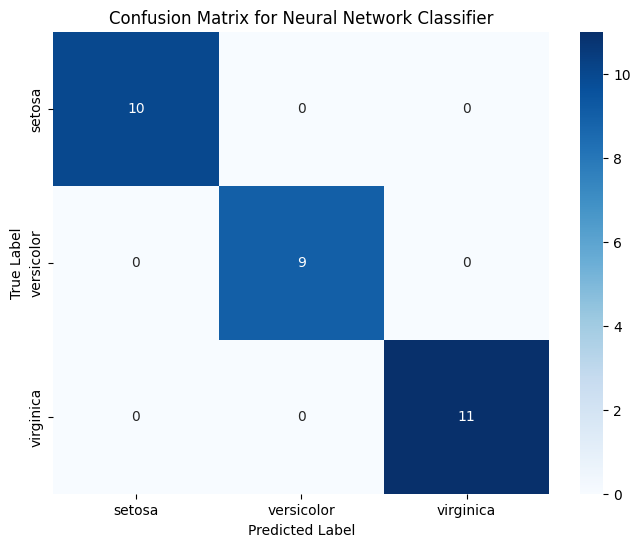

In [35]:
# Tính toán Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Hiển thị Confusion Matrix bằng heatmap
print("Huỳnh Thị Trúc Lam - 6351071040")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Neural Network Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**i) Sử dụng các mô hình phân lớp đã huấn luyện ở trên (câu e, f, g,h) cho 03 mẫu dữ liệu mới sau:**

[6.2, 2.9, 4.3, 1.3]

[5.1, 3.5, 1.4, 0.2]

[7.3, 2.8, 6.4, 2.1]

In [36]:
import numpy as np

# 03 mẫu dữ liệu mới
new_samples = np.array([
    [6.2, 2.9, 4.3, 1.3],
    [5.1, 3.5, 1.4, 0.2],
    [7.3, 2.8, 6.4, 2.1]
])

# Chuẩn hóa các mẫu dữ liệu mới theo cách tương tự X_normalized
# (chia cho max_values đã tìm được trước đó)
new_samples_normalized = new_samples / max_values

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Các mẫu dữ liệu mới đã chuẩn hóa:\n", new_samples_normalized)
print("\n--- Dự đoán bằng các mô hình --- ")

# Dự đoán bằng Decision Tree
predictions_dt = decision_tree_model.predict(new_samples_normalized)
print(f"\nDecision Tree Predictions: {predictions_dt} -> {[iris.target_names[p] for p in predictions_dt]}")

# Dự đoán bằng Naïve Bayes
predictions_nb = naive_bayes_model.predict(new_samples_normalized)
print(f"Naïve Bayes Predictions: {predictions_nb} -> {[iris.target_names[p] for p in predictions_nb]}")

# Dự đoán bằng K Nearest Neighbors
predictions_knn = knn_model.predict(new_samples_normalized)
print(f"K Nearest Neighbors Predictions: {predictions_knn} -> {[iris.target_names[p] for p in predictions_knn]}")

# Dự đoán bằng Neural Network
predictions_nn_probabilities = neural_network_model.predict(new_samples_normalized)
predictions_nn = np.argmax(predictions_nn_probabilities, axis=1)
print(f"Neural Network Predictions: {predictions_nn} -> {[iris.target_names[p] for p in predictions_nn]}")

Huỳnh Thị Trúc Lam - 6351071040
Các mẫu dữ liệu mới đã chuẩn hóa:
 [[0.78481013 0.65909091 0.62318841 0.52      ]
 [0.64556962 0.79545455 0.20289855 0.08      ]
 [0.92405063 0.63636364 0.92753623 0.84      ]]

--- Dự đoán bằng các mô hình --- 

Decision Tree Predictions: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
Naïve Bayes Predictions: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
K Nearest Neighbors Predictions: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Neural Network Predictions: [1 0 2] -> [np.str_('versicolor'), np.str_('setosa'), np.str_('virginica')]


**j) Nhận xét, đánh giá hiệu suất của các mô hình đã huấn luyện**

#### Tổng quan:
Tất cả bốn mô hình - Cây quyết định (Decision Tree), Naïve Bayes (GaussianNB), K Nearest Neighbors (KNN), và Mạng nơ-ron (Neural Network) - đều đạt độ chính xác (Accuracy) 100% trên tập dữ liệu kiểm tra. Điều này cho thấy các mô hình đã học rất tốt cách phân loại các loài hoa Iris dựa trên các thuộc tính đã cho, ít nhất là trên tập kiểm tra này. Các giá trị Precision, Recall và F1-score cho từng lớp cũng đạt 1.00, xác nhận rằng không có lỗi phân loại nào trên tập test.

#### Đánh giá chi tiết từng mô hình:

1.  **Cây quyết định (Decision Tree):**
    *   **Accuracy:** 1.0000
    *   **Classification Report:** Precision, Recall, F1-score đều là 1.00 cho tất cả ba lớp ('setosa', 'versicolor', 'virginica').
    *   **Confusion Matrix:** Cho thấy 10 mẫu setosa, 9 mẫu versicolor, và 11 mẫu virginica đều được phân loại đúng, không có nhầm lẫn giữa các lớp.
    *   **Nhận xét:** Cây quyết định hoạt động xuất sắc trên bộ dữ liệu này. Khả năng phân chia dữ liệu tuyến tính rõ ràng của Iris có thể đã giúp mô hình này dễ dàng tìm ra các ngưỡng phân loại hiệu quả.

2.  **Naïve Bayes (GaussianNB):**
    *   **Accuracy:** 1.0000
    *   **Classification Report:** Tương tự, tất cả các chỉ số Precision, Recall, F1-score đều là 1.00.
    *   **Confusion Matrix:** Cho thấy mô hình phân loại đúng tất cả các mẫu trong tập test.
    *   **Nhận xét:** Gaussian Naïve Bayes giả định các đặc trưng độc lập và tuân theo phân phối Gaussian. Trên bộ dữ liệu Iris đã được chuẩn hóa, giả định này có vẻ phù hợp hoặc ít nhất là không gây ảnh hưởng tiêu cực đến hiệu suất, dẫn đến kết quả hoàn hảo.

3.  **K Nearest Neighbors (KNN):**
    *   **Accuracy:** 1.0000
    *   **Classification Report:** Precision, Recall, F1-score đều là 1.00.
    *   **Confusion Matrix:** Không có mẫu nào bị phân loại sai.
    *   **Nhận xét:** KNN là một thuật toán dựa trên khoảng cách. Với `n_neighbors=5` và dữ liệu đã được chuẩn hóa, mô hình này cũng hoạt động rất tốt. Điều này ngụ ý rằng các lớp trong bộ dữ liệu Iris có sự tách biệt rõ ràng về mặt không gian, giúp việc xác định các 'hàng xóm' gần nhất trở nên hiệu quả.

4.  **Mạng nơ-ron (Neural Network):**
    *   **Accuracy:** 1.0000
    *   **Classification Report:** Precision, Recall, F1-score đều là 1.00.
    *   **Confusion Matrix:** Tất cả các mẫu đều được phân loại chính xác.
    *   **Nhận xét:** Mạng nơ-ron với hai lớp ẩn và hàm kích hoạt ReLU đã học được các mối quan hệ phức tạp trong dữ liệu. Việc đạt 100% độ chính xác cho thấy mạng đủ mạnh để nắm bắt các mẫu trong bộ dữ liệu Iris. Số lượng epoch cao (100) có thể đã giúp mô hình hội tụ tốt, nhưng cũng cần lưu ý đến khả năng overfitting nếu tập dữ liệu không đủ lớn hoặc phức tạp.

#### Kết luận chung:
Trên bộ dữ liệu Iris và tập kiểm tra đã cho, cả bốn mô hình đều thể hiện hiệu suất phân loại hoàn hảo (Accuracy 100%). Điều này cho thấy bộ dữ liệu Iris là một bộ dữ liệu tương đối 'dễ' đối với các thuật toán phân lớp tiêu chuẩn, hoặc các thuộc tính đã được chọn lọc tốt để phân biệt rõ ràng giữa các lớp.